# Energy Deposits per Detector Cell
---

The goal of this notebook is to help answer the following question: *How often in a given cell does BIB get in the way of reconstructing the particles we want to look at?*

To do so, we'll try to plot energy deposits per detector cell.

In [1]:
import ROOT as rt
import selections

# rt.EnableImplicitMT(1)  # Multithreading
# rt.gEnv.Print()         # View ROOT properties

Welcome to JupyROOT 6.24/06


In [2]:
# %%bash
# rootls -l /work/rhillman/Data/photonGun_1000_reco_990.root

In [3]:
treename = "events"
filename = "/work/rhillman/Data/photonGun_1000_reco_990.root"
df = rt.RDataFrame(treename, filename)

In [4]:
%%cpp
events->Print("ECalBarrel*")

******************************************************************************
*Chain   :events    : /work/rhillman/Data/photonGun_1000_reco_990.root       *
******************************************************************************
******************************************************************************
*Tree    :events    : events data tree                                       *
*Entries :       10 : Total =       138512552 bytes  File  Size =   62843895 *
*        :          : Tree compression factor =   2.20                       *
******************************************************************************
*Br    0 :ECalBarrelCollection : Int_t ECalBarrelCollection_                 *
*Entries :       10 : Total  Size=       6193 bytes  File Size  =        274 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :ECalBarrelCollection.cellID : ULong_t cell

Warning in <TClass::Init>: no dictionary for class edm4hep::TrackerHitPlaneData is available
Warning in <TClass::Init>: no dictionary for class edm4hep::Vector2f is available
Warning in <TClass::Init>: no dictionary for class edm4hep::Quantity is available
Warning in <TClass::Init>: no dictionary for class podio::version::Version is available


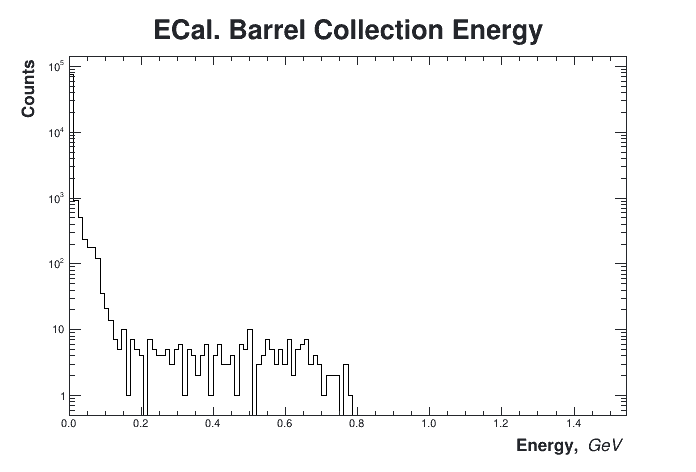

In [5]:
# %jsroot on
c = rt.TCanvas()
h = df.Histo1D("ECalBarrelCollection.energy")
h.SetTitle("ECal. Barrel Collection Energy")
h.GetXaxis().SetTitle("#bf{Energy,} #it{GeV}")
h.GetYaxis().SetTitle("#bf{Counts}")
h.Draw("")
c.SetLogy()
c.Draw()

How much of the total energy can you retain as a function of minimum energy threshold?

In [6]:
@rt.Numba.Declare(['float', 'int'], "float")
def pypow(x, y):
    return x**y

In [7]:
%%cpp
cout << "2^3 = " << Numba::pypow(2, 3) << endl;

2^3 = 8
